In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-test: {pearson_p_test:.4g}")
    
    spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-test: {spearman_p_test:.4g}")
def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()

def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def add_stats(df):
    df['mean'] = df.mean(axis=1)
    df['range'] = df.max(axis=1)-df.min(axis=1)
    df['std'] = df.std(axis=1)

def do_scatter(x, y, xlabel, ylabel, title, combined):
    plt.scatter(x, y, alpha=0.2)
    sc = plt.scatter(x, y, c=combined['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
    plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()
    
def bayesian_scatter(combined, xaxis, yaxis):
    x = combined[f'{xaxis}']
    y = combined[f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted all', combined)
    
    x = combined[combined['label'] == 'val1'][f'{xaxis}']
    y = combined[combined['label'] == 'val1'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val1', combined[combined['label'] == 'val1'])
    
    x = combined[combined['label'] == 'val2'][f'{xaxis}']
    y = combined[combined['label'] == 'val2'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val2', combined[combined['label'] == 'val2'])
    
    x = combined[combined['label'] == 'val3'][f'{xaxis}']
    y = combined[combined['label'] == 'val3'][f'{yaxis}']
    
    do_scatter(x, y, f'{xaxis}', f'{yaxis}', 'predicted val3', combined[combined['label'] == 'val3'])

In [2]:
# nonmouse log
def correlate():
    # correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_test2_df, doubled_test2_df, 'test2')
    # correlations(pred_val3_df, doubled_val3_df, 'val3')
    correlations(pred_test3_df, doubled_test3_df, 'test3')

    # print('\n')
    # correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['cow', 'pig']
# species_list = ['cow']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
# model_list = ['bdbi7l3n']
model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh']

for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_LiuAll/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_LiuAll_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR1: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        # print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_LiuAll/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos_LiuAll/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR2: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        # print(f'average neg test prediction: {pred_neg_df.mean()}')

        neg = 'nonMacaque_liver_andRat_andCow_andPig_VAL_500bp.bed'
        if species == 'rat':
            neg = 'nonRat_liver_andMacaque_andCow_andPig_VAL_500bp.bed'
        elif species == 'cow':
            neg = 'nonCow_liver_andMacaque_andRat_andPig_VAL_500bp.bed'
        elif species == 'pig':
            neg = 'nonPig_liver_andMacaque_andRat_andCow_VAL_500bp.bed'
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
        
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)
        val3_len = 2*len(val3_df)
        
        # input sanity check
        if len(pred_df) != val1_len+val2_len+val3_len:
            print("ERROR: predictions are a different length than validation sets")
        
        doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val1_df = pred_df.head(val1_len)
        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
        pred_val3_df = pred_df.tail(val3_len)
        
        doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

        # print(f'average val1 prediction: {pred_val1_df.mean()}')
        
        correlate()



        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')



macaque

bdbi7l3n
Pearson correlation coefficient for test2: 0.2895, p-test: 1.114e-19
Spearman correlation coefficient for test2: 0.2737, p-test: 1.119e-17
Pearson correlation coefficient for test3: 0.3420, p-test: 3.084e-70
Spearman correlation coefficient for test3: 0.3690, p-test: 2.539e-82

7vsdq5k2
Pearson correlation coefficient for test2: 0.2824, p-test: 9.166e-19
Spearman correlation coefficient for test2: 0.2789, p-test: 2.492e-18
Pearson correlation coefficient for test3: 0.3876, p-test: 2.35e-91
Spearman correlation coefficient for test3: 0.4110, p-test: 1.485e-103

wnfdrgcc
Pearson correlation coefficient for test2: 0.3053, p-test: 8.266e-22
Spearman correlation coefficient for test2: 0.2986, p-test: 6.871e-21
Pearson correlation coefficient for test3: 0.4113, p-test: 9.851e-104
Spearman correlation coefficient for test3: 0.4308, p-test: 1.072e-114

8i7h7nsh
Pearson correlation coefficient for test2: 0.2867, p-test: 2.581e-19
Spearman correlation coefficient for test2: 0.

In [4]:
# mouse log
def correlate():
    correlations(pred_train_df, doubled_train_df, 'train, pos only')
    correlations(pred_val_df, doubled_val_df, 'val, pos only')
    correlations(pred_pos_df, doubled_pos_df, 'test, pos only')
    
model_list = ['bdbi7l3n', '7vsdq5k2']
species = 'mouse'
for model in model_list:
    print(f'\n{model}')
        
     # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    pos_len = 2*len(pos_df)
    neg_len = 2*len(neg_df)
        
        # input sanity check
    if len(pred_df) != pos_len+neg_len:
        print("ERROR: predictions are a different length than testidation sets")
        
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_df.head(pos_len)
    pred_neg_df = pred_df.tail(neg_len)

    print(f'average neg test prediction: {pred_neg_df.mean()}')
        
    pred_val_train_mouse = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL_TRAIN.csv', header=None, sep='\t')
    
    neg_df = pd.read_csv(f'/home/azstephe/regression_liver/data/splits/negatives/nonMouse_liver_andRat_andCow_andPig_andMacaque_VAL_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/{species}_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(neg_df)
    val2_len = 2*len(val_df)
    val3_len = 2*len(train_df)
    
    # input sanity check
    if len(pred_val_train_mouse) != val1_len+val2_len+val3_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_neg_df = pred_val_train_mouse.head(val1_len)
    pred_val_df = pred_val_train_mouse.iloc[val1_len:val1_len + val2_len]
    pred_train_df = pred_val_train_mouse.tail(val3_len)

    pred_neg_pos_val_mouse = pd.concat([pred_neg_df, pred_val_df]).reset_index(drop=True)
    
    doubled_combined_val_train = pd.concat([doubled_neg_df, doubled_val_df, doubled_train_df]).reset_index(drop=True)
    mouse_combined = pd.concat([doubled_combined_val_train, pred_val_train_mouse])
    print(f'average neg val prediction: {pred_neg_df.mean()}')
    correlate()



bdbi7l3n
average neg test prediction: 0    0.609156
dtype: float64
average neg val prediction: 0    0.61926
dtype: float64
Pearson correlation coefficient for train, pos only: 0.4937, p-test: 0
Spearman correlation coefficient for train, pos only: 0.4982, p-test: 0
Pearson correlation coefficient for val, pos only: 0.4827, p-test: 1.745e-234
Spearman correlation coefficient for val, pos only: 0.4913, p-test: 4.294e-244
Pearson correlation coefficient for test, pos only: 0.4958, p-test: 0
Spearman correlation coefficient for test, pos only: 0.5022, p-test: 0

7vsdq5k2
average neg test prediction: 0    0.590392
dtype: float64
average neg val prediction: 0    0.599513
dtype: float64
Pearson correlation coefficient for train, pos only: 0.4967, p-test: 0
Spearman correlation coefficient for train, pos only: 0.5094, p-test: 0
Pearson correlation coefficient for val, pos only: 0.4574, p-test: 1.128e-207
Spearman correlation coefficient for val, pos only: 0.4768, p-test: 5.493e-228
Pearson co


macaque

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.3885, p-test: 2.454e-120
Spearman correlation coefficient for test 2+3: 0.3947, p-test: 1.845e-124


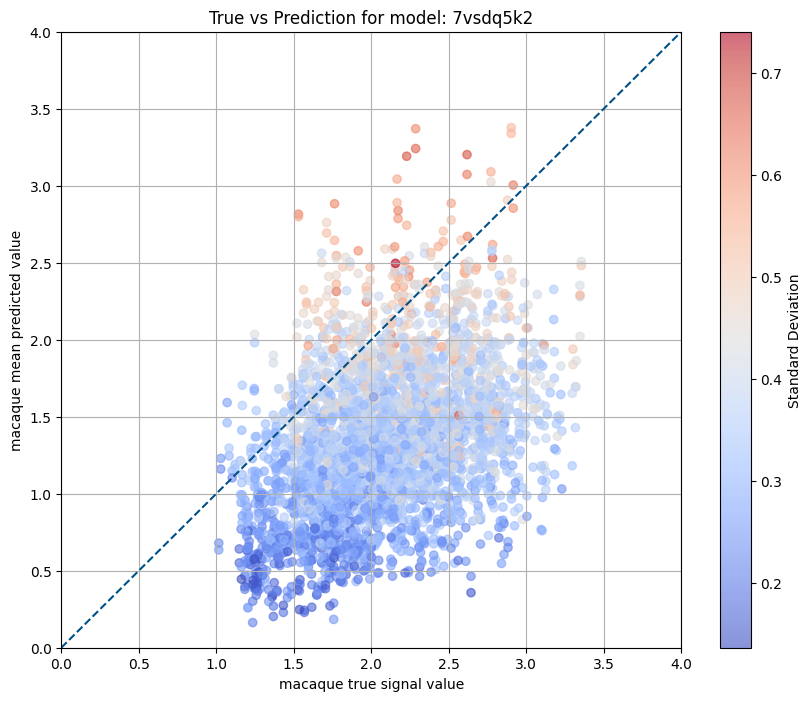


rat

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.3393, p-test: 6.637e-95
Spearman correlation coefficient for test 2+3: 0.3387, p-test: 1.362e-94


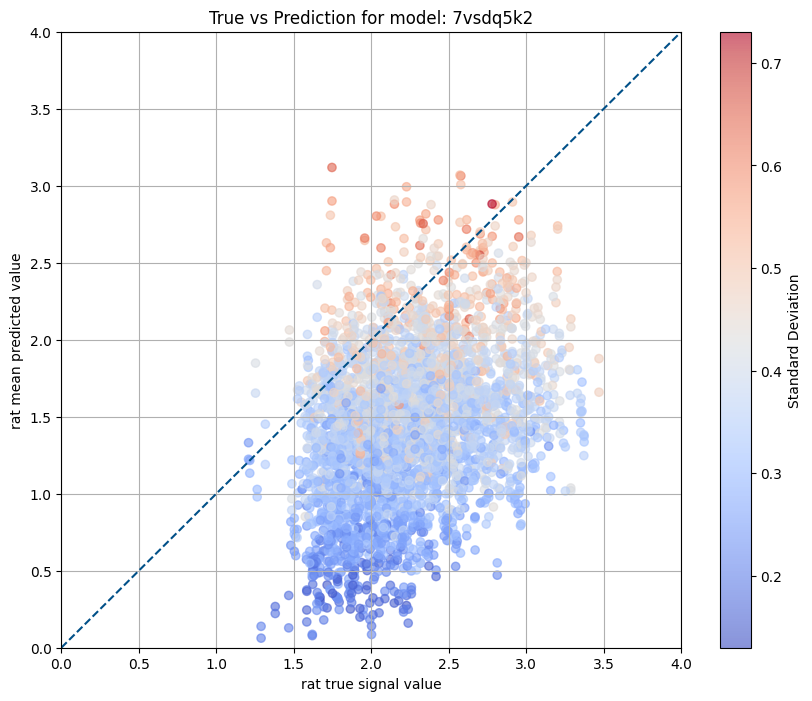


cow

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.3446, p-test: 1.413e-58
Spearman correlation coefficient for test 2+3: 0.3431, p-test: 4.929e-58


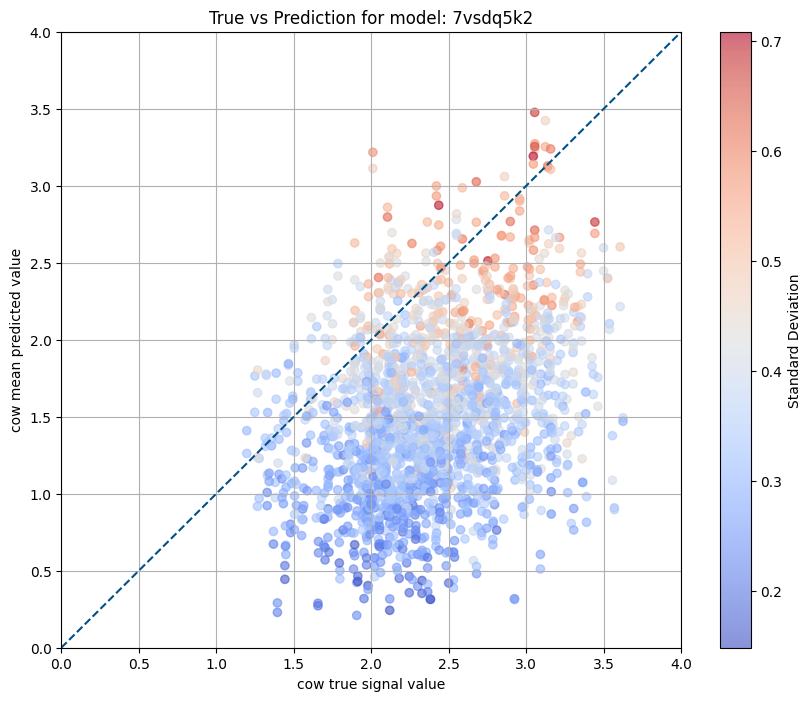


pig

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.3321, p-test: 3.671e-53
Spearman correlation coefficient for test 2+3: 0.3290, p-test: 3.907e-52


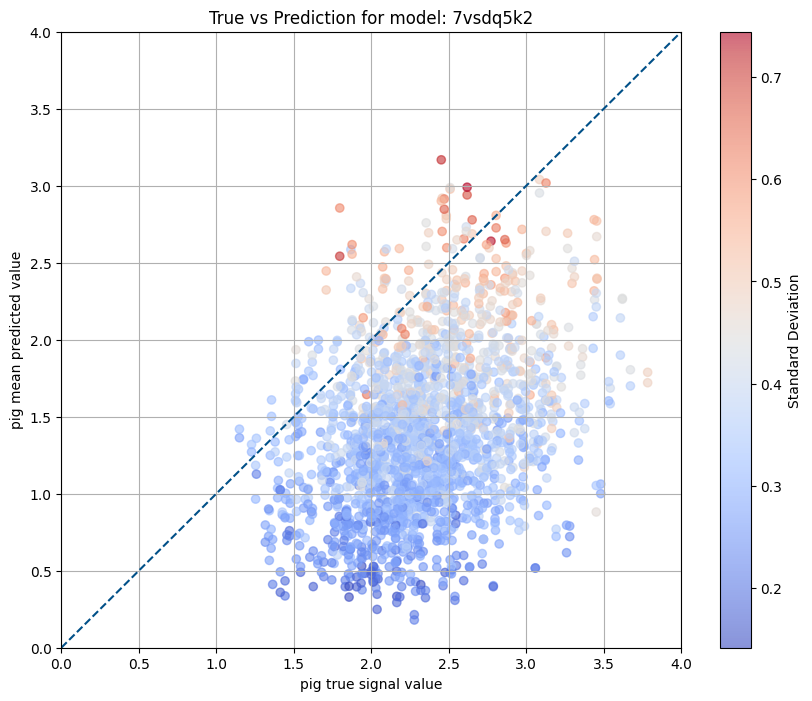

In [8]:
# non mouse bayesian
def correlate():
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_test2_df, doubled_test2_df, 'test2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    correlations(pred_test3_df, doubled_test3_df, 'test3')

    print('\n')
    correlations(pred_pos_df, doubled_pos_df, 'mouse orthologs')
    
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['rat']
model_list = ['7vsdq5k2']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_TEST.csv', header=None, delim_whitespace=True)
        add_stats(pred_baye)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test1_df = test1_df.replace(-1, 0)
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_baye) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        baye_test1_df = pred_baye.head(test1_len)
        baye_test2_df = pred_baye.iloc[test1_len:test1_len + test2_len]
        baye_test3_df = pred_baye.tail(test3_len)
        
        doubled_combined = pd.concat([doubled_test1_df, doubled_test2_df, doubled_test3_df])
        doubled_combined = doubled_combined.reset_index(drop=True)
        
        pred_baye = pred_baye.reset_index(drop=True)
        
        doubled_combined = doubled_combined.to_frame(name='true')
        
        doubled_combined.loc[0:test1_len-1, 'label'] = 'test1'
        doubled_combined.loc[test1_len:test1_len + test2_len - 1, 'label'] = 'test2'
        doubled_combined.loc[test1_len + test2_len:, 'label'] = 'test3'
        
        combined = pd.concat([pred_baye, doubled_combined], axis=1)
        
        squared_errors = (combined.loc[:, 0:63].subtract(combined['true'], axis=0)) ** 2
        combined['mse'] = squared_errors.mean(axis=1)
        combined['mean_diff'] = abs(combined['mean'] - combined['true'])

        posOnly = combined[test1_len:]
        
        x = posOnly['true']
        y = posOnly['mean']
        
        correlations(posOnly['true'], posOnly['mean'], 'test 2+3')
            
        plt.figure(figsize=(10, 8))
        plt.xlim(0, 4)
        plt.ylim(0, 4)
        plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
        sc = plt.scatter(x, y, c=posOnly['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
        plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
        # plt.scatter(x, y, alpha=0.2)
        plt.xlabel(f'{species} true signal value')
        plt.ylabel(f'{species} mean predicted value')
        plt.title(f'True vs Prediction for model: {model}')
        plt.grid(True)
        plt.show()

Pearson correlation coefficient for test 2+3: 0.3885, p-test: 2.454e-120
Spearman correlation coefficient for test 2+3: 0.3947, p-test: 1.845e-124


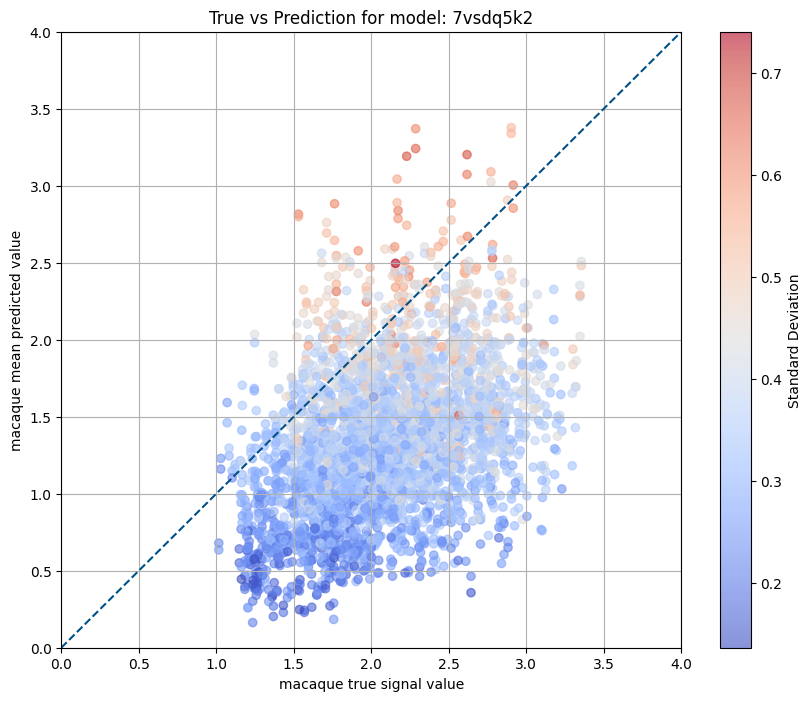

In [22]:
# nonmouse playground bayesian
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='macaque'
model='7vsdq5k2'

# load all the DFs
pred_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_TEST.csv', header=None, delim_whitespace=True)
add_stats(pred_baye)

test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
test1_df = test1_df.replace(-1, 0)
test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]

test1_len = 2*len(test1_df)
test2_len = 2*len(test2_df)
test3_len = 2*len(test3_df)

# input sanity check
if len(pred_baye) != test1_len+test2_len+test3_len:
    print("ERROR: predictions are a different length than testidation sets")

doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)

baye_test1_df = pred_baye.head(test1_len)
baye_test2_df = pred_baye.iloc[test1_len:test1_len + test2_len]
baye_test3_df = pred_baye.tail(test3_len)

doubled_combined = pd.concat([doubled_test1_df, doubled_test2_df, doubled_test3_df])
doubled_combined = doubled_combined.reset_index(drop=True)

pred_baye = pred_baye.reset_index(drop=True)

doubled_combined = doubled_combined.to_frame(name='true')

doubled_combined.loc[0:test1_len-1, 'label'] = 'test1'
doubled_combined.loc[test1_len:test1_len + test2_len - 1, 'label'] = 'test2'
doubled_combined.loc[test1_len + test2_len:, 'label'] = 'test3'

combined = pd.concat([pred_baye, doubled_combined], axis=1)

squared_errors = (combined.loc[:, 0:63].subtract(combined['true'], axis=0)) ** 2
combined['mse'] = squared_errors.mean(axis=1)
combined['mean_diff'] = abs(combined['mean'] - combined['true'])

posOnly = combined[test1_len:]
# filtered = posOnly[posOnly['std'] < 0.9]
filtered = posOnly
# x = combined['true'][val1_len:]
# y = combined['mean'][val1_len:]

x = filtered['true']
y = filtered['mean']

# x = filtered.loc[::2,'true']
# y = filtered.loc[::2,'pred']
    
correlations(posOnly['true'], posOnly['mean'], 'test 2+3')
    
plt.figure(figsize=(10, 8))
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
sc = plt.scatter(x, y, c=posOnly['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
# plt.scatter(x, y, alpha=0.2)
plt.xlabel(f'{species} true signal value')
plt.ylabel(f'{species} mean predicted value')
plt.title(f'True vs Prediction for model: {model}')
plt.grid(True)
plt.show()


macaque

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.4077, p-test: 3.489e-98
Spearman correlation coefficient for test 2+3: 0.4199, p-test: 1.129e-104
Intercept: 0.47837147462810437
Slope: 0.43278790534340106
p-value for slope = 1: 7.939362325725139e-158


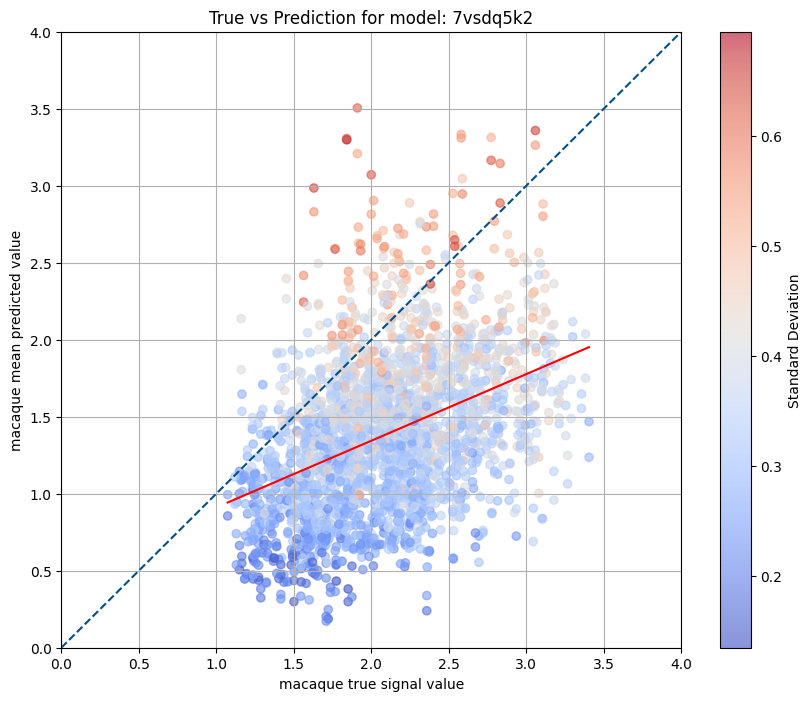


rat

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.3285, p-test: 3.706e-55
Spearman correlation coefficient for test 2+3: 0.3305, p-test: 7.524e-56
Intercept: 0.5598017040693463
Slope: 0.4077578313834686
p-value for slope = 1: 6.1990835224777585e-108


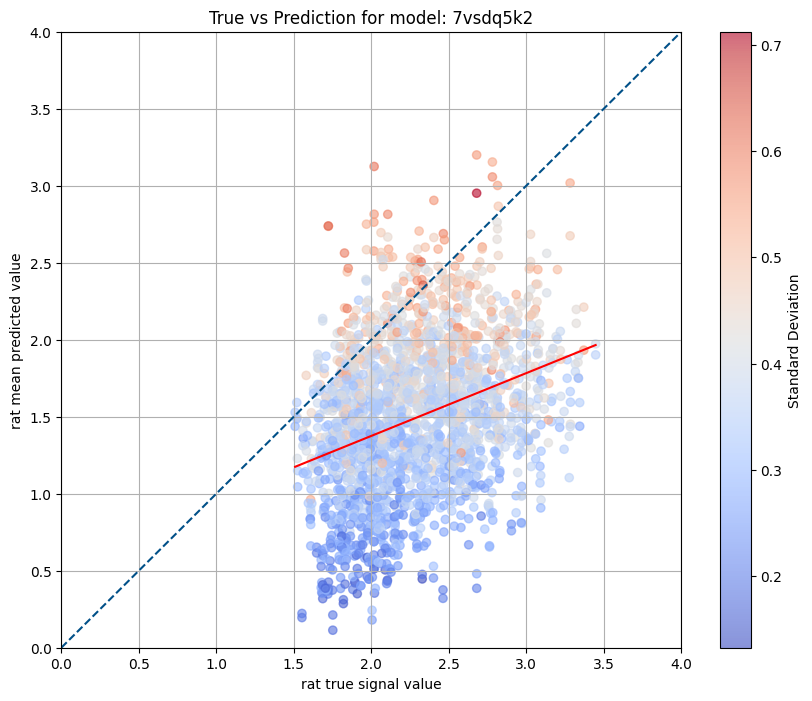


cow

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.3895, p-test: 1.541e-55
Spearman correlation coefficient for test 2+3: 0.3636, p-test: 4.168e-48
Intercept: 0.43800976602686803
Slope: 0.45135937698053913
p-value for slope = 1: 2.3065899383483477e-78


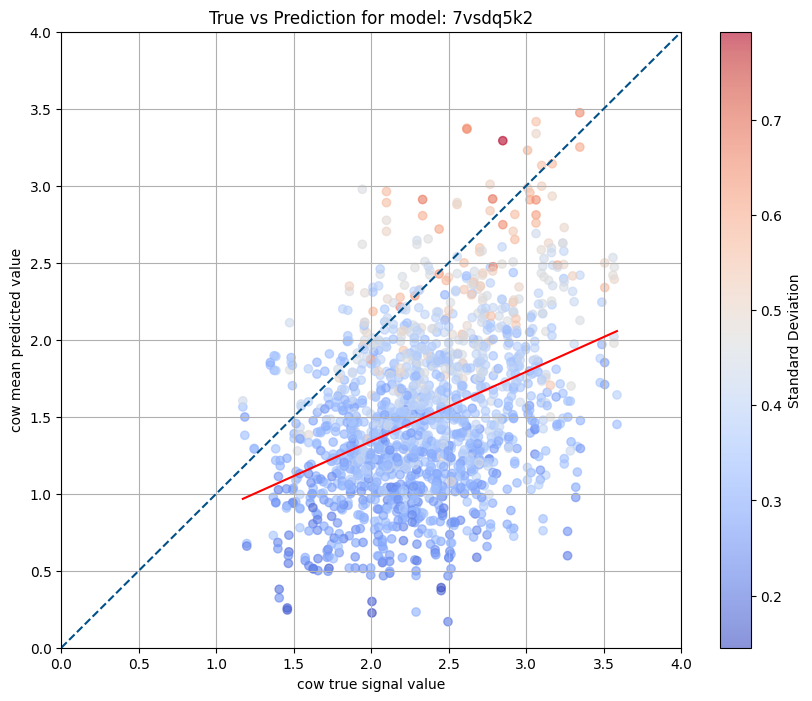


pig

7vsdq5k2
Pearson correlation coefficient for test 2+3: 0.3557, p-test: 2.031e-39
Spearman correlation coefficient for test 2+3: 0.3282, p-test: 1.769e-33
Intercept: 0.40899621363539174
Slope: 0.44036089874596557
p-value for slope = 1: 2.832117847518124e-60


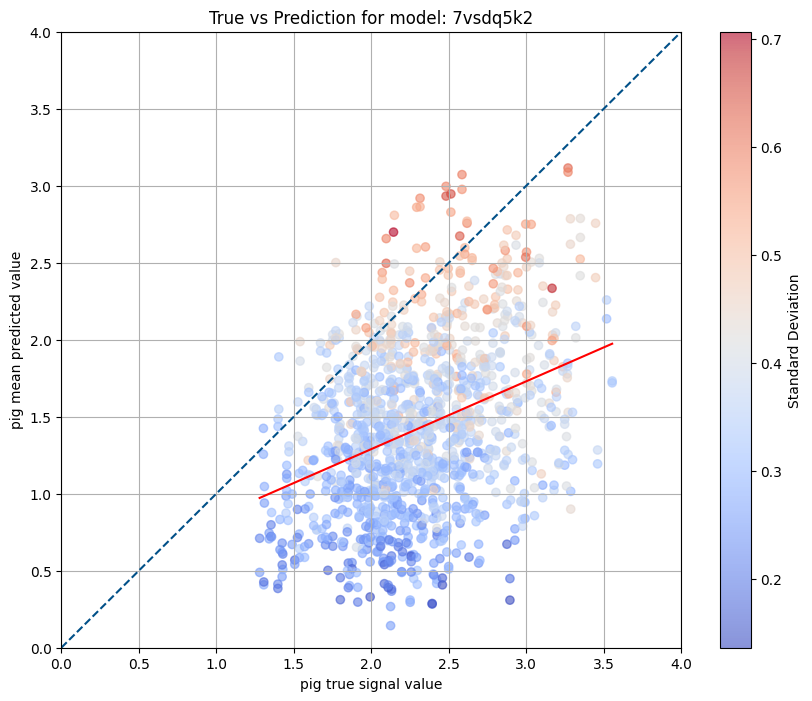

In [23]:
# non mouse bayesian w/ regression line
def correlate():
    correlations(pred_val2_df, doubled_val2_df, 'val2')
    correlations(pred_test2_df, doubled_test2_df, 'test2')
    correlations(pred_val3_df, doubled_val3_df, 'val3')
    correlations(pred_test3_df, doubled_test3_df, 'test3')

    print('\n')
    correlations(pred_pos_df, doubled_pos_df, 'mouse orthologs')
    
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['rat']
model_list = ['7vsdq5k2']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_baye = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}_bayesian/activations_{species}_VAL.csv', header=None, delim_whitespace=True)
        add_stats(pred_baye)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        test1_df = test1_df.replace(-1, 0)
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_baye) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        baye_test1_df = pred_baye.head(test1_len)
        baye_test2_df = pred_baye.iloc[test1_len:test1_len + test2_len]
        baye_test3_df = pred_baye.tail(test3_len)
        
        doubled_combined = pd.concat([doubled_test1_df, doubled_test2_df, doubled_test3_df])
        doubled_combined = doubled_combined.reset_index(drop=True)
        
        pred_baye = pred_baye.reset_index(drop=True)
        
        doubled_combined = doubled_combined.to_frame(name='true')
        
        doubled_combined.loc[0:test1_len-1, 'label'] = 'test1'
        doubled_combined.loc[test1_len:test1_len + test2_len - 1, 'label'] = 'test2'
        doubled_combined.loc[test1_len + test2_len:, 'label'] = 'test3'
        
        combined = pd.concat([pred_baye, doubled_combined], axis=1)
        
        squared_errors = (combined.loc[:, 0:63].subtract(combined['true'], axis=0)) ** 2
        combined['mse'] = squared_errors.mean(axis=1)
        combined['mean_diff'] = abs(combined['mean'] - combined['true'])

        posOnly = combined[test1_len:]
        
        x = posOnly['true']
        y = posOnly['mean']
        
        correlations(posOnly['true'], posOnly['mean'], 'test 2+3')
        ########################
        xval = posOnly['true'].values
        yval = posOnly['mean'].values
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(xval, yval)
        
        # Generate fitted line
        x_vals = np.linspace(min(xval), max(xval), 100)
        y_fit = slope * x_vals + intercept
        
        # Manually test if slope = 1
        # t = (slope - 1) / SE, df = n - 2
        t_stat = (slope - 1) / std_err
        df = len(xval) - 2
        p_slope_eq_1 = 2 * stats.t.sf(np.abs(t_stat), df)
        
        print("Intercept:", intercept)
        print("Slope:", slope)
        print("p-value for slope = 1:", p_slope_eq_1)
        #########################  
        plt.figure(figsize=(10, 8))
        plt.xlim(0, 4)
        plt.ylim(0, 4)
        plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
        plt.plot(x_vals, y_fit, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}') ##########

        sc = plt.scatter(x, y, c=posOnly['std'], cmap='coolwarm', alpha=0.6)  # 'coolwarm' goes from blue to red
        plt.colorbar(sc, label='Standard Deviation')  # adds a color bar legend
        # plt.scatter(x, y, alpha=0.2)
        plt.xlabel(f'{species} true signal value')
        plt.ylabel(f'{species} mean predicted value')
        plt.title(f'True vs Prediction for model: {model}')
        plt.grid(True)
        plt.show()

In [14]:
# macaque all
species_list = ['macaque']
model_list = ['bdbi7l3n']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_ALL.csv', header=None)
        pred_train_val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TRAIN_VAL.csv', header=None)
        
        all_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/macaque_liver_pos_ALL.bed', header=None, delim_whitespace=True).iloc[:,4]
        train_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/macaque_liver_TRAINONLY.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/logPos/macaque_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        all_len = 2*len(all_df)
        train_len = 2*len(train_df)
        val_len = 2*len(val_df)
        
        # input sanity check
        if len(pred_df) != all_len:
            print("ERROR: predictions are a different length than testidation sets")

        if len(pred_train_val_df) != train_len+val_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_all_df = pd.concat([all_df, all_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_train_df = pd.concat([train_df, train_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val_df = pd.concat([val_df, val_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        doubled_train_val_df = pd.concat([doubled_train_df, doubled_val_df]).reset_index(drop=True)
        
        correlations(pred_df, doubled_all_df, 'macaque all')
        correlations(pred_train_val_df, doubled_train_val_df, 'macaque train and val')
        correlations(pred_train_val_df.head(train_len), doubled_train_df, 'macaque train')
        correlations(pred_train_val_df.tail(val_len), doubled_val_df, 'macaque val')
        
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        correlations(pred_pos_df, doubled_pos_df, 'macaque test')


        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        # scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')



macaque

bdbi7l3n
Pearson correlation coefficient for macaque all: 0.3604, p-test: 0
Spearman correlation coefficient for macaque all: 0.3769, p-test: 0
Pearson correlation coefficient for macaque train and val: 0.3601, p-test: 0
Spearman correlation coefficient for macaque train and val: 0.3729, p-test: 0
Pearson correlation coefficient for macaque train: 0.3609, p-test: 0
Spearman correlation coefficient for macaque train: 0.3737, p-test: 0
Pearson correlation coefficient for macaque val: 0.3547, p-test: 1.784e-106
Spearman correlation coefficient for macaque val: 0.3661, p-test: 7.287e-114
Pearson correlation coefficient for macaque test: 0.3266, p-test: 1.034e-130
Spearman correlation coefficient for macaque test: 0.3461, p-test: 1.444e-147


In [5]:
def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()

    pearson_corr, _ = scipy.stats.pearsonr(x, y)
    spearman_corr, _ = scipy.stats.spearmanr(x, y)
    
    return {
        'group': group,
        'pearson': pearson,
        'spearman': spearman
    }
def correlate():
    groups = ['val2', 'val3', 'test2', 'test3', 'test orthologs']
    preds = [pred_val2_df, pred_val3_df, pred_test2_df, pred_test3_df, pred_pos_df]
    trues = [doubled_val2_df, doubled_val3_df, doubled_test2_df, doubled_test3_df, doubled_pos_df]

    rows = []
    for group, pred_df, true_df in zip(groups, preds, trues):
        x = true_df.squeeze()
        y = pred_df.squeeze()
        pearson, _ = scipy.stats.pearsonr(x, y)
        spearman, _ = scipy.stats.spearmanr(x, y)
        rows.append({'group': group, 'metric': 'pearson', 'value': pearson})
        rows.append({'group': group, 'metric': 'spearman', 'value': spearman})
    return pd.DataFrame(rows)

import pandas as pd

all_results = []
species_list = ['macaque', 'rat', 'cow', 'pig']
model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']

for species in species_list:
    for model in model_list:
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        # print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)
        
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        # print(f'average neg test prediction: {pred_neg_df.mean()}')

        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
        
        val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        val1_len = 2*len(val1_df)
        val2_len = 2*len(val2_df)
        val3_len = 2*len(val3_df)
        
        # input sanity check
        if len(pred_df) != val1_len+val2_len+val3_len:
            print("ERROR: predictions are a different length than validation sets")

        doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_val1_df = pred_df.head(val1_len)
        pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
        pred_val3_df = pred_df.tail(val3_len)
        
        doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

        # print(f'average val1 prediction: {pred_val1_df.mean()}')
        
        corr_df = correlate()
        corr_df['species'] = species
        corr_df['model'] = model
        all_results.append(corr_df)



summary_df = pd.concat(all_results)

# Pivot so each model is a column
pivot_df = summary_df.pivot_table(
    index=['species', 'group', 'metric'],
    columns='model',
    values='value'
).reset_index()

def highlight_max(row):
    numeric_values = row.iloc[3:]  # adjust index based on your actual layout
    max_val = numeric_values.max()
    return ['' if i < 3 else 'background-color: yellow' if val == max_val else '' 
            for i, val in enumerate(row)]

styled_df = pivot_df.style.apply(highlight_max, axis=1)
styled_df
styled_df.to_excel("/home/azstephe/liverRegression/regression_liver/data/figs/tables/log_model_eval_table.xlsx", engine='openpyxl', index=False)

In [4]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.9 MB/s eta 0:00:0000:01


In [6]:
# test log scatter

direc='test_scatter/'

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rho):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}'
    plt.text(0.07, 0.93, textstr, transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top')
    plt.grid(True)
    # plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()

species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['macaque']

model_list = ['bdbi7l3n', 'kf8188qf', 'cq45eb2s']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        print(f'average test1 prediction: {pred_test1_df.mean()}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        print(f'average neg test prediction: {pred_neg_df.mean()}')
        
        # load all the DFs
        # pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
        
        # val1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/val1/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        # val2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val2/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        # val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
        
        # val1_len = 2*len(val1_df)
        # val2_len = 2*len(val2_df)
        # val3_len = 2*len(val3_df)
        
        # # input sanity check
        # if len(pred_df) != val1_len+val2_len+val3_len:
        #     print("ERROR: predictions are a different length than validation sets")
        
        # doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        # doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        # doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        # pred_val1_df = pred_df.head(val1_len)
        # pred_val2_df = pred_df.iloc[val1_len:val1_len + val2_len]
        # pred_val3_df = pred_df.tail(val3_len)
        
        # doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df, doubled_val3_df])

        # print(f'average val1 prediction: {pred_val1_df.mean()}')
        
        # val2R, val2RP, val2Rho, val2RhoP = correlations(pred_val2_df, doubled_val2_df, 'val2')
        test2R, test2RP, test2Rho, test2RhoP = correlations(pred_test2_df, doubled_test2_df, 'test2')
        # val3R, val2RP, val3Rho, val3RhoP = correlations(pred_val3_df, doubled_val3_df, 'val3')
        test3R, test3RP, test3Rho, test3RhoP = correlations(pred_test3_df, doubled_test3_df, 'test3')
    
        print('\n')
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')


        # scatter(pred_val2_df, doubled_val2_df, f'{species.capitalize()} Prediction Accuracy for Val2', 'True', 'Predicted', val2R, val2Rho)
        # scatter(pred_val3_df, doubled_val3_df, f'{species.capitalize()} Prediction Accuracy for Val3', 'True', 'Predicted', val3R, val3Rho)
        # scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for Test2 ({model})', 'True', 'Predicted', test2R, test2Rho)
        # scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for Test3 ({model})', 'True', 'Predicted', test3R, test3Rho)
        # scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'True', 'Predicted', orthoR, orthoRho)

species = 'mouse'
for model in model_list:
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR: predictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)

    print(f'average neg test prediction: {pred_neg_df.mean()}')
    
    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    # scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'True', 'Predicted', orthoR, orthoRho)




macaque

bdbi7l3n
average test1 prediction: 0    0.583191
dtype: float64
average neg test prediction: 0    0.603672
dtype: float64


NameError: name 'pearson' is not defined


cow

bdbi7l3n
average neg test prediction: 0    0.677357
dtype: float64
Pearson correlation coefficient for mouse test orthologs: 0.4348, p-test: 1.76e-08
Spearman correlation coefficient for mouse test orthologs: 0.4557, p-test: 2.875e-09


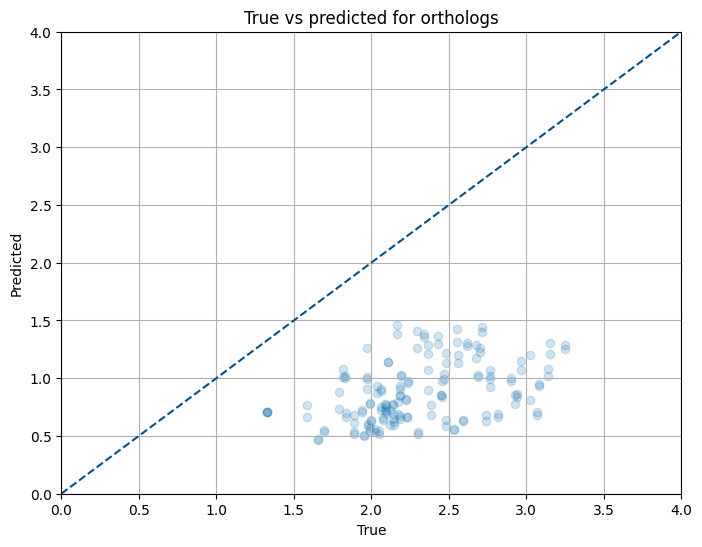

In [4]:
# nonmouse log
def correlate():
    correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    
species_list = ['cow']
# species_list = ['rat']
model_list = ['bdbi7l3n']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_cow_pig_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test4/cow_pig_liver_pos_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test5/cow_pig_liver_neg_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        print(f'average neg test prediction: {pred_neg_df.mean()}')
        
        correlate()



        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')



cow

bdbi7l3n
average neg test prediction: 0    0.619083
dtype: float64
Pearson correlation coefficient for mouse test orthologs: 0.3769, p-test: 7.746e-113
Spearman correlation coefficient for mouse test orthologs: 0.3852, p-test: 3.337e-118


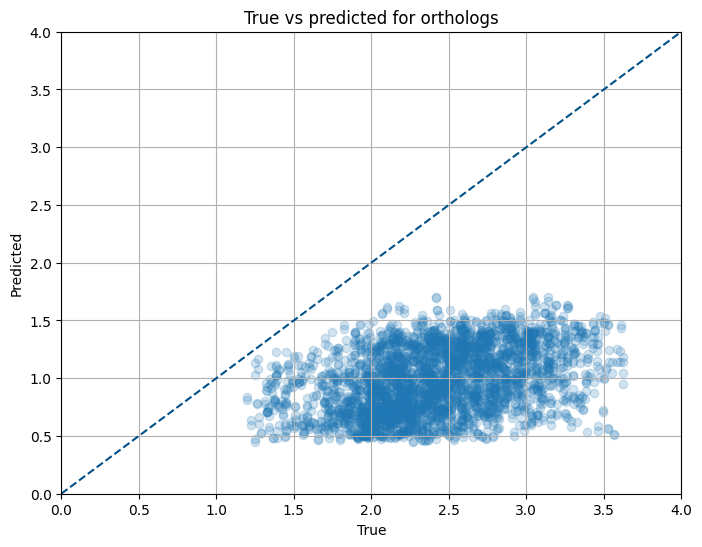


pig

bdbi7l3n
average neg test prediction: 0    0.624624
dtype: float64
Pearson correlation coefficient for mouse test orthologs: 0.3884, p-test: 1.118e-117
Spearman correlation coefficient for mouse test orthologs: 0.3945, p-test: 1.257e-121


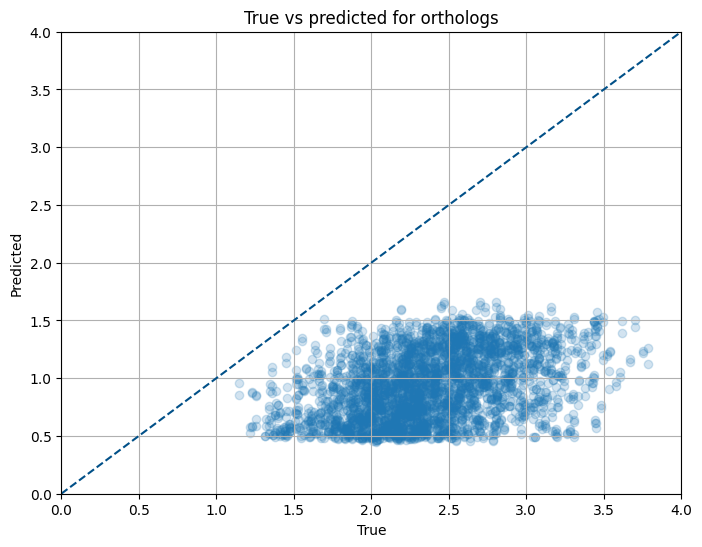

In [5]:
# nonmouse log
def correlate():
    correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
    
species_list = ['cow', 'pig']
# species_list = ['rat']
model_list = ['bdbi7l3n']
# model_list = ['bdbi7l3n', '7vsdq5k2', 'wnfdrgcc', '8i7h7nsh', 'ph4wrpxu']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        print(f'average neg test prediction: {pred_neg_df.mean()}')
        
        correlate()



        # scatter(pred_test2_df, doubled_test2_df, 'True vs predicted for test2', 'True', 'Predicted')
        # scatter(pred_test3_df, doubled_test3_df, 'True vs predicted for test3', 'True', 'Predicted')
        scatter(pred_pos_df, doubled_pos_df, 'True vs predicted for orthologs', 'True', 'Predicted')


        # histogram(pred_test1_df, 'test1 predictions', 'Predicted signal')
        # histogram(pred_test2_df, 'test2 predictions', 'Predicted signal')
        # histogram(pred_test3_df, 'test3 predictions', 'Predicted signal')
    
        # histogram(pred_neg_df, 'negative test predictions', 'Predicted signal')
        # histogram(pred_pos_df, 'positive test predictions', 'Predicted signal')
